# Zomato Data Analysis

  Business Requirment
  
  1. How many Restaurents providing Online delivery
  2. Show the top 3 Countries where Zomato rooted strogly
  3. show Top 3 cities in india where activity is high
  4. Find the Costliest Restaurents
  5. Find the Reataurents where cost is less than 5% of Costliest Restaurents
  6. what are the Cuisines avilable in Reataurent 'Vikings'
  7. Which is the Best Reastaurent in Delhi for Japanese Food
  8. What is the 3rd highest cuisines ordered in USA
  9. Find all Reataurents in India which has POOR rating
  10. How many Customers Rated the Service
  11. What is the Rating got by Reataurents in Delhi
  12. In how many Cities Do zomato have Service in USA
  13. Best Reataurents in Bangalore where Table Booking is Available

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r'C:\Users\HP\Desktop\Kishan PY\data analyst\data sets\zomato.csv', encoding='Latin')

In [3]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [4]:
df.drop(['Restaurant ID','Address','Locality','Longitude','Latitude','Locality Verbose','Switch to order menu','Votes','Is delivering now'], axis=1, inplace=True)

In [5]:
df.head(3)

,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text
0,Le Petit Souffle,162,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,3,4.8,Dark Green,Excellent
1,Izakaya Kikufuji,162,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,3,4.5,Dark Green,Excellent
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,4,4.4,Green,Very Good


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Cuisines              9542 non-null   object 
 4   Average Cost for two  9551 non-null   int64  
 5   Currency              9551 non-null   object 
 6   Has Table booking     9551 non-null   object 
 7   Has Online delivery   9551 non-null   object 
 8   Price range           9551 non-null   int64  
 9   Aggregate rating      9551 non-null   float64
 10  Rating color          9551 non-null   object 
 11  Rating text           9551 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 895.5+ KB


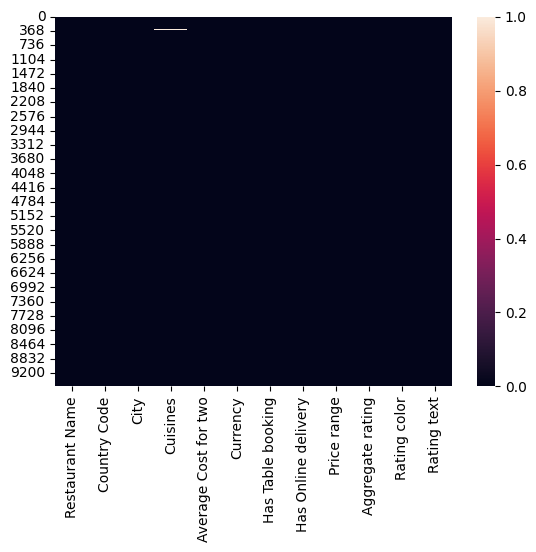

In [7]:
sns.heatmap(df.isnull())
plt.show()

# Replacing missing records

In [8]:
a = df['Cuisines'].value_counts().index[0]
df['Cuisines'].fillna(a, inplace= True) 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Cuisines              9551 non-null   object 
 4   Average Cost for two  9551 non-null   int64  
 5   Currency              9551 non-null   object 
 6   Has Table booking     9551 non-null   object 
 7   Has Online delivery   9551 non-null   object 
 8   Price range           9551 non-null   int64  
 9   Aggregate rating      9551 non-null   float64
 10  Rating color          9551 non-null   object 
 11  Rating text           9551 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 895.5+ KB


# Check for Duplicate

In [10]:
df.shape

(9551, 12)

In [11]:
df[df.duplicated()]

,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text
741,Onesta,1,Bangalore,"Pizza, Cafe, Italian",600,Indian Rupees(Rs.),No,No,2,4.6,Dark Green,Excellent
1003,The Chaiwalas,1,Faridabad,Cafe,300,Indian Rupees(Rs.),No,No,1,0.0,White,Not rated
1053,Green Chick Chop,1,Faridabad,"Raw Meats, North Indian, Fast Food",350,Indian Rupees(Rs.),No,No,1,3.1,Orange,Average
1497,Subway,1,Gurgaon,"American, Fast Food, Salad, Healthy Food",500,Indian Rupees(Rs.),No,Yes,2,2.8,Orange,Average
1532,Cafe Coffee Day,1,Gurgaon,Cafe,450,Indian Rupees(Rs.),No,No,1,3.1,Orange,Average
...,...,...,...,...,...,...,...,...,...,...,...,...
9073,Cafe Coffee Day,1,Noida,Cafe,450,Indian Rupees(Rs.),No,No,1,2.7,Orange,Average
9074,Cafe Coffee Day,1,Noida,Cafe,450,Indian Rupees(Rs.),No,No,1,2.7,Orange,Average
9093,Nazeer Foods,1,Noida,"Mughlai, North Indian",600,Indian Rupees(Rs.),No,Yes,2,3.6,Yellow,Good
9291,Talaga Sampireun,94,Jakarta,"Sunda, Indonesian",200000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(9213, 12)

# Encoding country code

In [14]:
df['Country Code'].value_counts()

1      8316
216     434
215      80
30       60
214      60
189      60
148      40
208      33
14       24
162      22
184      20
94       20
166      20
191      20
37        4
Name: Country Code, dtype: int64

In [15]:
df['Country Code']=df['Country Code'].replace(1,91)

In [16]:
df['Country Code'].value_counts().head(2)

91     8316
216     434
Name: Country Code, dtype: int64

In [17]:
codes={ 91:'India',216:'USA',215:'UK',30:'Brazil',214:'UAE',189:'canada',148:'newzealand',208:'Turky',14:'Bostwana',162:'indonasia',184:'Iraq',94:'Srilanka',166:'Azerbaijan',191:'argentina',37:'others'}

In [18]:
df['country'] = df['Country Code'].map(codes)

In [19]:
df.drop(['Country Code'], axis=1, inplace=True)

In [20]:
df.head(4)

,Restaurant Name,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,country
0,Le Petit Souffle,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,3,4.8,Dark Green,Excellent,indonasia
1,Izakaya Kikufuji,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,3,4.5,Dark Green,Excellent,indonasia
2,Heat - Edsa Shangri-La,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,4,4.4,Green,Very Good,indonasia
3,Ooma,Mandaluyong City,"Japanese, Sushi",1500,Botswana Pula(P),No,No,4,4.9,Dark Green,Excellent,indonasia


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9213 entries, 0 to 9550
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9213 non-null   object 
 1   City                  9213 non-null   object 
 2   Cuisines              9213 non-null   object 
 3   Average Cost for two  9213 non-null   int64  
 4   Currency              9213 non-null   object 
 5   Has Table booking     9213 non-null   object 
 6   Has Online delivery   9213 non-null   object 
 7   Price range           9213 non-null   int64  
 8   Aggregate rating      9213 non-null   float64
 9   Rating color          9213 non-null   object 
 10  Rating text           9213 non-null   object 
 11  country               9213 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 935.7+ KB


# 1. Percentage of Restaurants delivering Online 

In [22]:
b = df['Has Online delivery'].value_counts()
b

No     6872
Yes    2341
Name: Has Online delivery, dtype: int64

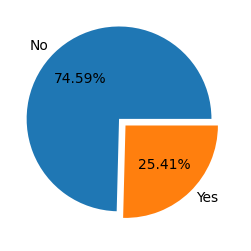

In [23]:
plt.figure(figsize=(5,3))
plt.pie(b, labels=b.index, autopct= "%1.2f%%", explode=[0.1,0])
plt.show()

# 2. Find Top 3 Countries where zomato rooted well

First way : using Count function

In [24]:
c= df['country'].value_counts()[:3]
c

India    8316
USA       434
UK         80
Name: country, dtype: int64

Second way : Using Group function

In [25]:
d=df.groupby(['country']).size().reset_index().rename(columns={0:'count'}).sort_values('count',ascending=False)
d.head(4)

,country,count
3,India,8316
9,USA,434
8,UK,80
2,Brazil,60


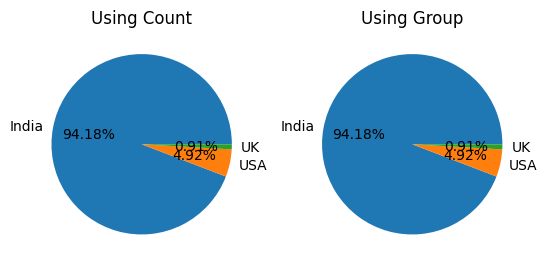

In [26]:
plt.subplot(1,2,1)
plt.pie(c.values,labels=c.index, autopct= "%1.2f%%")
plt.title('Using Count')
plt.subplot(1,2,2)
plt.pie(d['count'][:3],labels=d['country'][:3], autopct= "%1.2f%%")
plt.title('Using Group')
plt.show()

# 3. Find Top 3 cities in India where Activity is high

In [27]:
e=df[df['country']=='India']['City'].value_counts()
e.head(3)

New Delhi    5211
Gurgaon      1089
Noida        1041
Name: City, dtype: int64

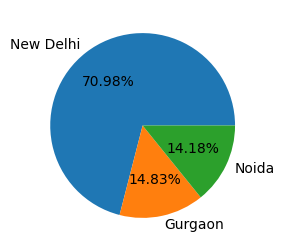

In [28]:
plt.figure(figsize=(5,3))
plt.pie(e.values[:3],labels=e.index[:3],autopct= "%1.2f%%")
plt.show()

In [29]:
df.head(3)

,Restaurant Name,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,country
0,Le Petit Souffle,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,3,4.8,Dark Green,Excellent,indonasia
1,Izakaya Kikufuji,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,3,4.5,Dark Green,Excellent,indonasia
2,Heat - Edsa Shangri-La,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,4,4.4,Green,Very Good,indonasia


# 4. Find the 5 costliest Restaurant 

In [30]:
f=df[['Restaurant Name','Average Cost for two']].sort_values('Average Cost for two',ascending=False)[:5]
f

,Restaurant Name,Average Cost for two
9284,Satoo - Hotel Shangri-La,800000
9283,Skye,800000
9287,Sushi Masa,500000
9289,3 Wise Monkeys,450000
9294,Avec Moi Restaurant and Bar,350000


# 5. Show all the Restaurants where Cost is less than 5% of   Costliest Restaurant

In [31]:
g=int(f['Average Cost for two'][:1] * 0.05)
g

40000

In [32]:
h= df[df['Average Cost for two'] <= g ][['Restaurant Name','City','Average Cost for two']].sort_values('Average Cost for two',ascending=False)
h.head(4)

,Restaurant Name,City,Average Cost for two
7543,Orient Express - Taj Palace Hotel,New Delhi,8000
4088,Tian - Asian Cuisine Studio - ITC Maurya,New Delhi,7000
4087,Bukhara - ITC Maurya,New Delhi,6500
8,Spiral - Sofitel Philippine Plaza Manila,Pasay City,6000


# 6. What are the Cuisines avilable in Restaurant viking

In [33]:
df[df['Restaurant Name']=='Vikings'][['Restaurant Name','Cuisines']]

,Restaurant Name,Cuisines
7,Vikings,"Seafood, Filipino, Asian, European"


# 7.  Best Resurant for Japanese food in New delhi

In [34]:
i= df[(df['country']=='India') & (df['City']=='New Delhi')&(df['Aggregate rating']>=4)][['Restaurant Name','Cuisines','Aggregate rating']]
i[i['Cuisines'].isin(['Japanese'])]

,Restaurant Name,Cuisines,Aggregate rating
3102,Fuji Japanese Restaurant,Japanese,4.0


# 8. which is the 3nd highest ordered cuisine in USA

In [35]:
df[df['country']=='USA']['Cuisines'].value_counts().index[2]

'North Indian'

# 9. Show Restaurants in India which has poor rating

In [36]:
j= df[(df['country']=="India") & (df['Rating text']=='Poor')][['Restaurant Name','City','Aggregate rating']]
j.sort_values('Aggregate rating').head()

,Restaurant Name,City,Aggregate rating
1138,Pind Balluchi,Ghaziabad,1.8
7507,Subway,New Delhi,1.9
4224,Muffins,New Delhi,1.9
9106,Moti Mahal Delux Tandoori Trail,Noida,2.0
5197,New Baba Da Dhaba,New Delhi,2.0


# 10. How many Customers Rated the Service

In [37]:
l=df['Rating color']=='White'
l1=l.value_counts()
l1

False    7131
True     2082
Name: Rating color, dtype: int64

In [38]:
dict1={'Rated':'True','Not Rated':'False'}

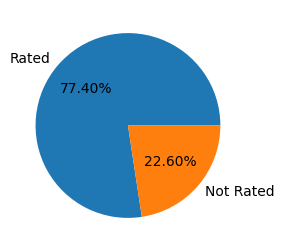

In [39]:
plt.figure(figsize=(5,3))
plt.pie(l1, labels=dict1,autopct= "%1.2f%%")
plt.show()

# 11. Rating got by Restaurent in New delhi

In [46]:
m=df[(df['City']=='New Delhi')&(df['Rating color'].isin(['Orange','Yellow','Green','Dark Green','Red']))]['Rating color'].value_counts()
m

Orange        2328
Yellow        1078
Green          295
Red             92
Dark Green      27
Name: Rating color, dtype: int64

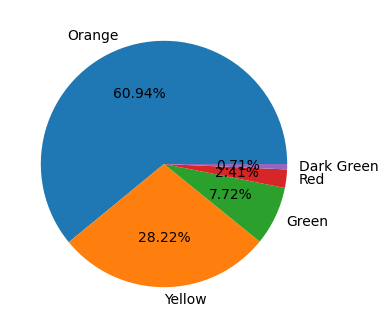

In [47]:
plt.figure(figsize=(6,4))
plt.pie(m,labels=m.index, autopct='%1.2f%%')
plt.show()

In [48]:
df.head(3)

,Restaurant Name,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,country
0,Le Petit Souffle,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,3,4.8,Dark Green,Excellent,indonasia
1,Izakaya Kikufuji,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,3,4.5,Dark Green,Excellent,indonasia
2,Heat - Edsa Shangri-La,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,4,4.4,Green,Very Good,indonasia


# 12. In how many Cities Do zomato have its service in USA

In [49]:
df[df['country']=="USA"]['City'].nunique()

35

# 13. Best reastarent in Bangalore where Table booking is avilable

In [50]:
df[(df['City']=='Bangalore')&(df['Rating text']>='Excellent')&(df['Has Table booking']=='Yes')][['Restaurant Name','Aggregate rating']].sort_values('Aggregate rating',ascending=False).head(4)

,Restaurant Name,Aggregate rating
727,The Fatty Bao - Asian Gastro Bar,4.7
743,Big Brewsky,4.5
740,Flechazo,4.4
726,Sultans of Spice,4.1
